In [15]:
using PyPlot
using JLD2, FileIO
using StatsBase, LinearAlgebra, Distributions
using ForwardDiff
using Printf
Base.show(io::IO, f::Float64) = @printf(io, "%1.3f", f)

In [16]:
include("../utils.jl")
include("eval_helper.jl")
include("../lqgame.jl")

lqgame_QRE_3player (generic function with 1 method)

In [17]:
@load "../data/2020-08-10T20:55:27.417.jld2"  data

1-element Array{Symbol,1}:
 :data

In [18]:
num_dem = length(data["demonstration_xtrajectory"])
state_dim = size(data["demonstration_xtrajectory"][1])[2]
ctrl_dim = size(data["demonstration_utrajectory"][1])[2]
steps = size(data["demonstration_xtrajectory"][1])[1]
demo_theta = data["true theta"]

demos = reshape(vcat(data["demonstration_xtrajectory"]...), (steps, num_dem, state_dim));

### demonstrations

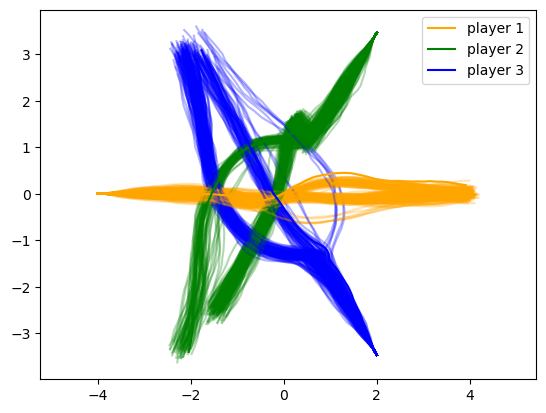

PyObject <matplotlib.legend.Legend object at 0x7fb739087e80>

In [19]:
fig, ax = subplots(1,1)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.axis("equal")
for i = 1:size(demos)[2]
    ax.plot(demos[:,i,1], demos[:,i,2], color="orange", alpha=0.3)
    ax.plot(demos[:,i,5], demos[:,i,6], color="green", alpha=0.3)
    ax.plot(demos[:,i,9], demos[:,i,10], color="blue", alpha=0.3)
end
ax.plot(demos[:,1,1], demos[:,1,2], color="orange", label="player 1")
ax.plot(demos[:,1,5], demos[:,1,6], color="green", label="player 2")
ax.plot(demos[:,1,9], demos[:,1,10], color="blue", label="player 3")
ax.legend()

## MA-IRL learning 

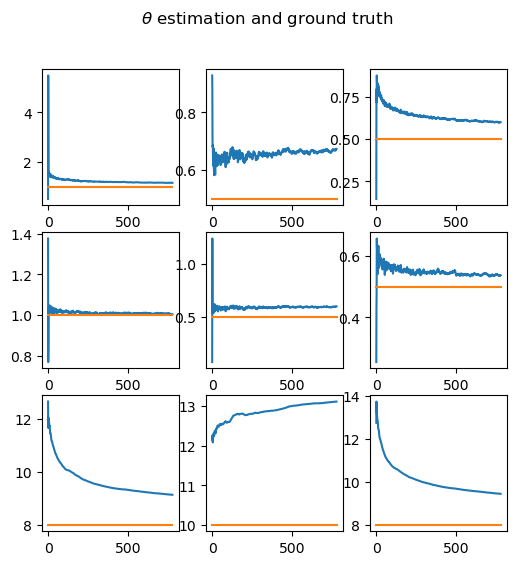

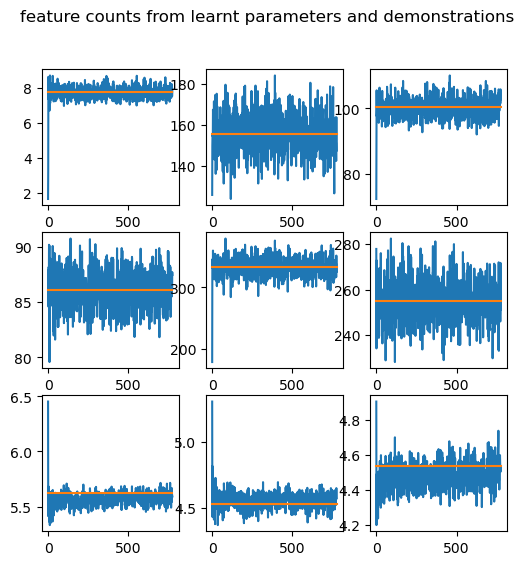

PyObject Text(0.5, 0.98, 'feature counts from learnt parameters and demonstrations')

In [21]:
num = size(data["theta_est"])[1]
# plot the theta estimation
rows = 3
cols = 3
figsize=(6,6)
fig_theta, axs_theta = subplots(rows, cols, figsize=figsize)
for (idx, ax) in enumerate(axs_theta)
    ax.plot(data["theta_est"][:,idx])
    ax.plot(ones(num) * data["true theta"][idx])
end
suptitle(L"$\theta$ estimation and ground truth")


# plot the feature counts vs. feature counts from demonstration
rows = 3
cols = 3
figsize=(6,6)
fig_fc, axs_fc = subplots(rows, cols, figsize=figsize)
for (idx, ax) in enumerate(axs_fc)
    ax.plot(data["feature_counts_proposed"][:,idx])
    ax.plot(ones(num-1) * data["feature_counts_demonstration"][idx])
end
suptitle("feature counts from learnt parameters and demonstrations")

In [22]:
# demonstration
println(" ----- demonstration ---- ")
cost_dem_1 = data["feature_counts_demonstration"][1:3]' * data["true theta"][1:3]
cost_dem_2 = data["feature_counts_demonstration"][4:6]' * data["true theta"][4:6]
cost_dem_3 = data["feature_counts_demonstration"][7:end]' * data["true theta"][7:end]
println(" demo feature counts ", data["feature_counts_demonstration"][1:3], " ", data["feature_counts_demonstration"][4:6], " ", data["feature_counts_demonstration"][7:end])
println(" true theta ", data["true theta"][1:3], " ", data["true theta"][4:6], " ", data["true theta"][7:end])
println(" this is demonstrated cost: player 1- ", cost_dem_1, " and player 2- ", cost_dem_2, " and player 3- ", cost_dem_3)


# estimation
println(" ----- estimation ---- ")
if size(data["feature_counts_proposed"])[1] > 20
    fc_avg = mean(data["feature_counts_proposed"][end-20:end,:], dims=1)[:]
    theta_avg = mean(data["theta_est"][end-20:end,:], dims=1)[:]
else
    fc_avg = mean(data["feature_counts_proposed"][1:end,:], dims=1)[:]
    theta_avg = mean(data["theta_est"][1:end,:], dims=1)[:]
end

println(" est feature counts ", fc_avg[1:3], " ", fc_avg[4:6], " ", fc_avg[7:end])
println(" estimated  theta ", theta_avg[1:3], theta_avg[4:6], theta_avg[7:end])
cost_est_1 = fc_avg[1:3]' * theta_avg[1:3]
cost_est_2 = fc_avg[4:6]' * theta_avg[4:6]
cost_est_3 = fc_avg[7:9]' * theta_avg[7:9]
println(" this is estimated cost: player 1- ", cost_est_1, " and player 2- ", cost_est_2, " and player 3- ", cost_est_3)


 ----- demonstration ---- 
 demo feature counts [7.754, 86.091, 5.626] [155.779, 332.960, 4.531] [100.362, 254.953, 4.540]
 true theta [1.000, 1.000, 8.000] [0.500, 0.500, 10.000] [0.500, 0.500, 8.000]
 this is demonstrated cost: player 1- 138.852 and player 2- 289.684 and player 3- 213.975
 ----- estimation ---- 
 est feature counts [7.819, 86.417, 5.611] [151.442, 330.889, 4.565] [101.251, 252.039, 4.547]
 estimated  theta [1.153, 1.004, 9.145][0.670, 0.597, 13.101][0.598, 0.537, 9.457]
 this is estimated cost: player 1- 147.112 and player 2- 358.727 and player 3- 238.896


### apply to other tasks 

 --- generating sim number : 3 ---
 --- generating sim number : 6 ---
 --- generating sim number : 9 ---
 --- generating sim number : 12 ---
 --- generating sim number : 15 ---
 --- generating sim number : 18 ---
 --- generating sim number : 21 ---
 --- generating sim number : 24 ---
 --- generating sim number : 27 ---
 --- generating sim number : 30 ---
 --- generating sim number : 33 ---
 --- generating sim number : 36 ---
 --- generating sim number : 39 ---
 --- generating sim number : 42 ---
 --- generating sim number : 45 ---
 --- generating sim number : 48 ---
 --- generating sim number : 51 ---
 --- generating sim number : 54 ---
 --- generating sim number : 57 ---
 --- generating sim number : 60 ---
 --- generating sim number : 63 ---
 --- generating sim number : 66 ---
 --- generating sim number : 69 ---
 --- generating sim number : 72 ---
 --- generating sim number : 75 ---
 --- generating sim number : 78 ---
 --- generating sim number : 81 ---
 --- generating sim number : 84

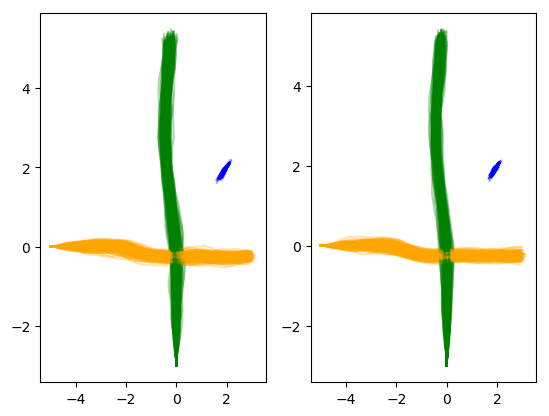

 ===== stats comparison ======= 
    true reward: [6.13284, 65.7256, 3.04447, 9.94824, 132.388, 3.20487, 6.661, 126.431, 2.37258]
     est reward: [6.03696, 66.6864, 3.03921, 9.34157, 109.081, 3.19713, 6.43769, 118.962, 2.37936]


In [7]:
feature_k = length(data["true theta"])
x_init_list = [
               [-5.0 0.0 1.33 0.0         0.0 -3.0 1.33 pi/2      2.0 2.0 0.1 -pi*3/4]]


fig_task, axes_task = subplots(length(x_init_list), 2)
sim_param = data["sim_param"]
# returns game instance for 3 players 
est_game = define_game(data["state_dims"], data["ctrl_dims"], data["DT"], theta_avg)
true_game = define_game(data["state_dims"], data["ctrl_dims"], data["DT"], data["true theta"])
sample_size = 200

for i = 1:length(x_init_list)
    x_init = x_init_list[i]
    x_ref = zeros(steps*2, state_dim)
    x_ref[1,:] = x_init
    for i=1:steps*2 - 1
        x_ref[i+1,:] = true_game.dynamics_func([x_ref[i,:]; zeros(ctrl_dim)])
    end

    # true game results
    true_results = generate_simulations(sim_param=sim_param,
                                      nl_game=true_game,
                                      x_init=x_init,
                                      traj_ref=x_ref,
                                      num_sim=sample_size)

    x_trajectories_true = true_results.state_trajectories
    u_trajectories_true = true_results.ctrl_trajectories

    feature_counts_true = get_feature_counts_three(true_game, x_trajectories_true, u_trajectories_true, x_ref, feature_k)
    for ii = 1:sample_size
        axes_task[(i-1)*2+1].plot(x_trajectories_true[ii][:,1], x_trajectories_true[ii][:,2], color="orange", alpha=0.3)
        axes_task[(i-1)*2+1].plot(x_trajectories_true[ii][:,5], x_trajectories_true[ii][:,6], color="green", alpha=0.3)
        axes_task[(i-1)*2+1].plot(x_trajectories_true[ii][:,9], x_trajectories_true[ii][:,10], color="blue", alpha=0.3)
    end


    # estimated game results
    mairl_results = generate_simulations(sim_param=sim_param,
                                      nl_game=est_game,
                                      x_init=x_init,
                                      traj_ref=x_ref,
                                      num_sim=sample_size)

    x_trajectories_mairl = mairl_results.state_trajectories
    u_trajectories_mairl = mairl_results.ctrl_trajectories

    feature_counts_mairl = get_feature_counts_three(est_game, x_trajectories_mairl, u_trajectories_mairl, x_ref, feature_k)
    for ii = 1:sample_size
        axes_task[(i-1)*2+2].plot(x_trajectories_mairl[ii][:,1], x_trajectories_mairl[ii][:,2], color="orange", alpha=0.3)
        axes_task[(i-1)*2+2].plot(x_trajectories_mairl[ii][:,5], x_trajectories_mairl[ii][:,6], color="green", alpha=0.3)
        axes_task[(i-1)*2+2].plot(x_trajectories_mairl[ii][:,9], x_trajectories_mairl[ii][:,10], color="blue", alpha=0.3)
    end
    println(" ===== stats comparison ======= ")
    println("    true reward: ", feature_counts_true)
    println("     est reward: ", feature_counts_mairl)
end

# baseline comparison

In [22]:
# theta value from cioc
cioc_theta = [2.4807054, 1., 8.36532665, 0.66685417, 0.5, 7.8541684, 0.7604217, 0.5, 8.0547359];    # tracking, control, collision 

In [19]:
cioc_game = define_game(data["state_dims"], data["ctrl_dims"], data["DT"], cioc_)

#=============
generate simulations
==============#
feature_k = length(cioc_theta)
cioc_results = generate_simulations(sim_param=sim_param,
                                   nl_game=cioc_game,
                                   x_init=x_init,
                                   traj_ref=x_ref,
                                   num_sim=200)
x_trajectories_cioc = cioc_results.state_trajectories
u_trajectories_cioc = cioc_results.ctrl_trajectories

LoadError: UndefVarError: state_dims not defined

In [23]:
# avg_dem_feature_counts_cioc, all_counts_cioc = get_feature_counts(true_game, x_trajectories_cioc, u_trajectories_cioc, x_ref, feature_k)
println("cioc theta:     ", cioc_theta)

cioc theta:     [2.4807054, 1.0, 8.36532665, 0.66685417, 0.5, 7.8541684, 0.7604217, 0.5, 8.0547359]


In [26]:
println("    feature counts ")
println("         tracking1 ctrl1   coll1    tracking2 ctrl2   coll2    tracking3 ctrl3   coll3")
println("demo      ", avg_feature_counts_mairl)
println("MA-IRL    ", avg_feature_counts_true)
println("CIOC      ", avg_dem_feature_counts_cioc)

    feature counts 
         tracking1 ctrl1   coll1    tracking2 ctrl2   coll2    tracking3 ctrl3   coll3
demo      [4.65783, 65.341, 2.33089, 29.2764, 141.501, 2.33089]
MA-IRL    [4.99714, 66.0274, 2.40793, 29.8307, 145.184, 2.40793]
CIOC      [2.19015, 63.7061, 2.96162, 19.9295, 138.721, 2.96162]
